In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import mpl_toolkits.mplot3d

import numpy as np
from numpy.linalg import cond, norm, inv

import pandas as pd
from scipy.stats import linregress as linreg
import scipy.sparse.linalg as spla

import pickle
import os.path
import itertools

from poly_basis import *
from rbf import *
from spherepts import *
from laplacebeltrami import *

from sphere_gaussians import get_sphere_gaussians

In [47]:
matplotlib.rcParams.update({'font.size': 16})

In [28]:
n = 1000
eps = None
k = 100
d = 4

rbfs = rbf_labels

# Sphere

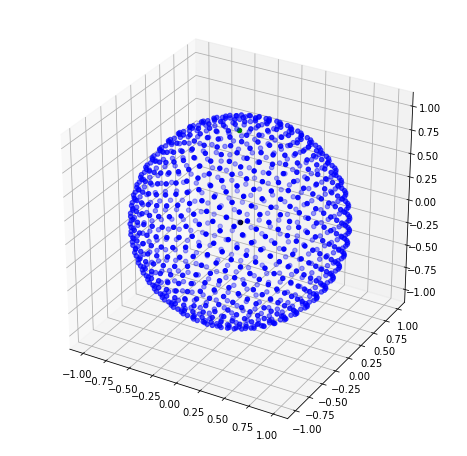

In [36]:
forcing, exact = get_sphere_gaussians()

nodes = gen_spiral_nodes(n)
normals = nodes

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(nodes[1:,0], nodes[1:,1], nodes[1:,2], '.', color='b')
ax.scatter(nodes[0,0], nodes[0,1], nodes[0,2], '.', color='g')
ax.scatter(0, 0, 0, '.', color='k')

plt.show()

In [16]:
for rbf in rbf_labels:
    rbf_obj = rbf_dict[rbf]
    try:
        C = SOGr(nodes, normals, rbf_obj, eps, k, poly_deg=None, poly_type='p')
    except:
        print('%s failed' % rbf)
        continue
    fs = np.array([forcing(node) for node in nodes])
    ds = C @ fs
    es = np.array([exact(node) for node in nodes])
    print('%s \t error: %g' % (rbf, la.norm(ds - es)/la.norm(es)) )

epsilon set: 1.26732
gaussian 	 error: 0.000168537
epsilon set: 0.77016
multiquadric 	 error: 5.91256e-05
epsilon set: 0.589618
inverse quadratic 	 error: 4.61109e-05
epsilon set: 0.6473
inverse multiquadric 	 error: 4.9676e-05
r^2 log(r) failed
r^4 log(r) failed
r^6 log(r) failed


/home/sage/Documents/rbf-rg-website/lib/rbf.py:138: RuntimeWarning: divide by zero encountered in true_divide
  return 2/r**2
/home/sage/Documents/rbf-rg-website/lib/laplacebeltrami.py:240: RuntimeWarning: invalid value encountered in multiply
  return phi1(r,eps) + d**2 * phi2(r,eps)


r^8 log(r) 	 error: 54.0995
r^10 log(r) 	 error: 6.55187
r^12 log(r) 	 error: 40.6901
r^14 log(r) 	 error: 117.473
r^16 log(r) 	 error: 402.605
r^18 log(r) 	 error: 1029.03
r^3 failed
r^5 failed
r^7 failed


/home/sage/Documents/rbf-rg-website/lib/rbf.py:358: RuntimeWarning: divide by zero encountered in true_divide
  return 3/r


r^9 	 error: 3.74363e+09
r^11 	 error: 7.0988e+08
r^13 	 error: 1.75277e+11
r^15 	 error: 5.94044e+09
r^17 	 error: 4.50495e+10


# Plane

In [23]:
def vogel(n):
    theta_hat = np.pi*(3-np.sqrt(5))
    inner_nodes = [(np.sqrt(i/n)*np.cos(i*theta_hat), 
                    np.sqrt(i/n)*np.sin(i*theta_hat), 
                    0) for i in range(1,n+1)]
    return np.array(inner_nodes)

In [22]:
forcing = lambda x: np.cos(x[0])*np.sin(x[1])
exact = lambda x: -np.sin(x[0])*np.sin(x[1]) + np.cos(x[0])*np.cos(x[1])

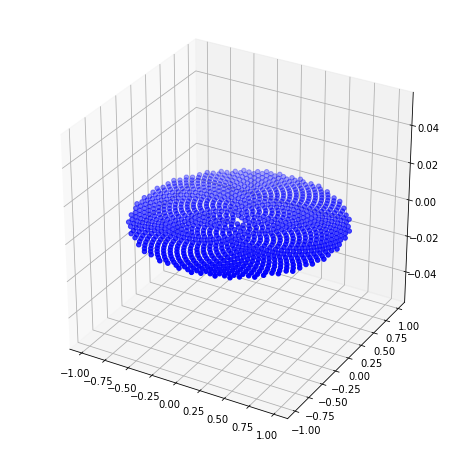

In [35]:
nodes = vogel(n)
normals = np.zeros((n,3))
normals[:,2] = np.ones(n)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(nodes[1:,0], nodes[1:,1], nodes[1:,2], '.', color='b')
plt.show()

In [37]:
for rbf in rbf_labels:
    rbf_obj = rbf_dict[rbf]
    try:
        C = SOGr(nodes, normals, rbf_obj, eps, k, poly_deg=None, poly_type='p')
    except:
        print('%s failed' % rbf)
        continue
    fs = np.array([forcing(node) for node in nodes])
    ds = C @ fs
    es = np.array([exact(node) for node in nodes])
    print('%s \t error: %g' % (rbf, la.norm(ds - es)/la.norm(es)) )

epsilon set: 1.26732
gaussian 	 error: 0.000168537
epsilon set: 0.77016
multiquadric 	 error: 5.91256e-05
epsilon set: 0.589618
inverse quadratic 	 error: 4.61109e-05
epsilon set: 0.6473
inverse multiquadric 	 error: 4.9676e-05
r^2 log(r) failed
r^4 log(r) failed
r^6 log(r) failed


/home/sage/Documents/rbf-rg-website/lib/rbf.py:138: RuntimeWarning: divide by zero encountered in true_divide
  return 2/r**2
/home/sage/Documents/rbf-rg-website/lib/laplacebeltrami.py:240: RuntimeWarning: invalid value encountered in multiply
  return phi1(r,eps) + d**2 * phi2(r,eps)


r^8 log(r) 	 error: 54.0995
r^10 log(r) 	 error: 6.55187
r^12 log(r) 	 error: 40.6901
r^14 log(r) 	 error: 117.473
r^16 log(r) 	 error: 402.605
r^18 log(r) 	 error: 1029.03
r^3 failed
r^5 failed
r^7 failed


/home/sage/Documents/rbf-rg-website/lib/rbf.py:358: RuntimeWarning: divide by zero encountered in true_divide
  return 3/r


r^9 	 error: 3.74363e+09
r^11 	 error: 7.0988e+08
r^13 	 error: 1.75277e+11
r^15 	 error: 5.94044e+09
r^17 	 error: 4.50495e+10


# Proof Plots

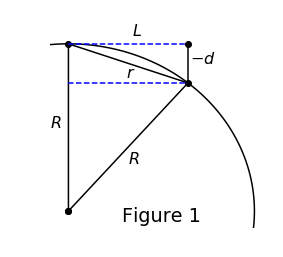

In [76]:
ts = np.linspace(-.1*np.pi, .6*np.pi, 100)
theta = 2*np.pi/9

fig = plt.figure(figsize=(4,4))

plt.plot([0, 0, np.sin(theta), 0], [0, 1, np.cos(theta), 0], 'ko-')
plt.plot(np.cos(ts), np.sin(ts), 'k-')
plt.plot([0, np.sin(theta)], [1,1], 'b--')
plt.plot([np.sin(theta)], [1], 'ko')
plt.plot([0, np.sin(theta)], [np.cos(theta),np.cos(theta)], 'b--')
plt.plot([np.sin(theta), np.sin(theta)], [np.cos(theta), 1], 'k-')

plt.text(-.1, .5 , '$R$')
plt.text(.5*np.sin(theta), .5*np.cos(theta)-.1 , '$R$')
plt.text(.9*np.sin(theta/2), .9*np.cos(theta/2)-.05, '$r$')
plt.text(np.sin(theta)+.01, (1+np.cos(theta))/2, '$-d$')
plt.text(np.sin(theta/2), 1.05, '$L$')

plt.xlim(-.1, 1.1)
plt.ylim(-.1, 1.2)
plt.axis('off')
plt.title('Figure 1', y=0)
plt.show()